In [9]:
%time classifier = sdcvehicle.classification.fit_best_model()

loaded 8792 vehicle images and 9666 nonvehicle images
Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] feature_extractor__hist_nbins=128, feature_extractor__pixels_per_cell=(6, 6), feature_extractor__cells_per_block=(3, 3), svc__C=215.443469003 
[CV]  feature_extractor__hist_nbins=128, feature_extractor__pixels_per_cell=(6, 6), feature_extractor__cells_per_block=(3, 3), svc__C=215.443469003, total=  28.9s
[CV] feature_extractor__hist_nbins=128, feature_extractor__pixels_per_cell=(6, 6), feature_extractor__cells_per_block=(3, 3), svc__C=215.443469003 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   45.1s remaining:    0.0s


[CV]  feature_extractor__hist_nbins=128, feature_extractor__pixels_per_cell=(6, 6), feature_extractor__cells_per_block=(3, 3), svc__C=215.443469003, total=  31.6s
[CV] feature_extractor__hist_nbins=128, feature_extractor__pixels_per_cell=(6, 6), feature_extractor__cells_per_block=(3, 3), svc__C=215.443469003 
[CV]  feature_extractor__hist_nbins=128, feature_extractor__pixels_per_cell=(6, 6), feature_extractor__cells_per_block=(3, 3), svc__C=215.443469003, total=  30.8s
[CV] feature_extractor__hist_nbins=32, feature_extractor__pixels_per_cell=(8, 8), feature_extractor__cells_per_block=(2, 2), svc__C=215.443469003 
[CV]  feature_extractor__hist_nbins=32, feature_extractor__pixels_per_cell=(8, 8), feature_extractor__cells_per_block=(2, 2), svc__C=215.443469003, total=  24.9s
[CV] feature_extractor__hist_nbins=32, feature_extractor__pixels_per_cell=(8, 8), feature_extractor__cells_per_block=(2, 2), svc__C=215.443469003 
[CV]  feature_extractor__hist_nbins=32, feature_extractor__pixels_per_

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 33.3min finished


best model performance on test: 0.984832069339
CPU times: user 34min 41s, sys: 10.1 s, total: 34min 51s
Wall time: 33min 54s


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from glob import glob
from skimage import io
import sdcvehicle

%matplotlib inline
import matplotlib.pyplot as plt

## classifier

In [3]:
%time model = sdcvehicle.classification.build_model()

loaded 8792 vehicle images and 9666 nonvehicle images
built model performance on test: 0.985373781148
CPU times: user 33.2 s, sys: 504 ms, total: 33.7 s
Wall time: 33.7 s


## detector

In [3]:
import cv2

In [4]:
test_imgs = [io.imread(f) for f in glob("../test_images/*.jpg")]

In [5]:
test_img = test_imgs[1]
test_img.shape

(720, 1280, 3)

In [7]:
detector = sdcvehicle.detection.VehicleDetector()

building vehicle classification model
loaded 8792 vehicle images and 9666 nonvehicle images
built model performance on test: 0.961809317443


### original image

In [8]:
model = detector.vehicle_model

In [9]:
from scipy.misc import imresize

In [10]:
# test_img = imresize(test_imgs[1], 0.55)
plot_img = test_img.copy()
for patch, bbox in detector.slide_window(test_img, (0.5, 1)):
#     cv2.rectangle(plot_img, bbox[0][::-1], bbox[1][::-1], (255, 0, 0), 1)
#     print(bbox)
    result = model.predict([patch])
#     print(result[0])
    if result[0] == "vehicle":
        cv2.rectangle(plot_img, bbox[0], bbox[1], (255, 0, 0), 3)

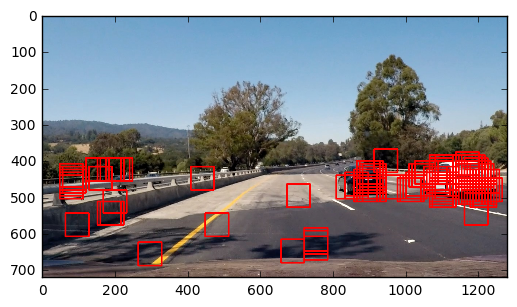

In [11]:
plt.imshow(plot_img)

### image pyramid

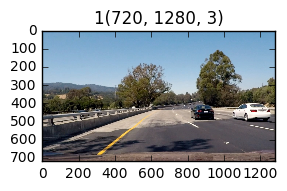

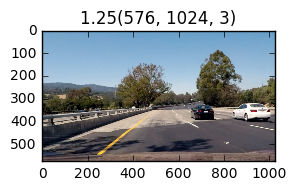

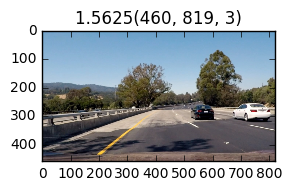

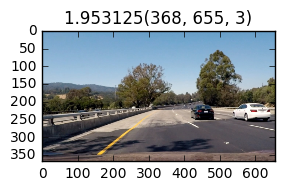

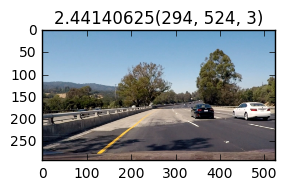

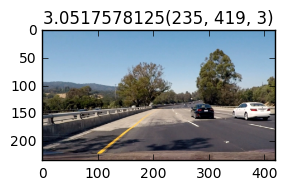

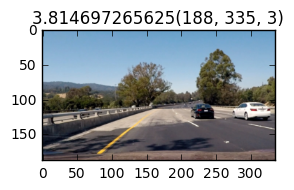

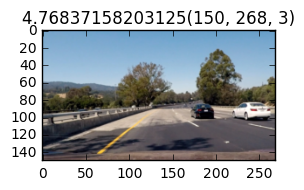

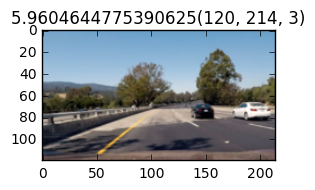

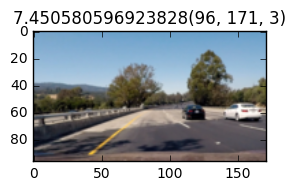

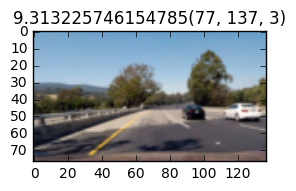

In [77]:
for img, factor in detector.get_image_pyramid(test_img):
    plt.figure(figsize=(3, 3))
    plt.imshow(img)
    plt.title(str(factor)+str(img.shape))

### pyramid and sliding window

In [12]:

plot_img = test_img.copy()
for patch, bbox, multiple in detector.get_pyramid_slide_window(test_img, window_params={'rows':(0.5, 1)
                                                                             , "stride": (8, 8)}):
    result = model.predict([patch])
    if result[0] == "vehicle":
        cv2.rectangle(plot_img, bbox[0], bbox[1], (255, 0, 0), 3)
#     print(multiple)
#     cv2.rectangle(plot_img, bbox[0], bbox[1], (255, 0, 0), 3)

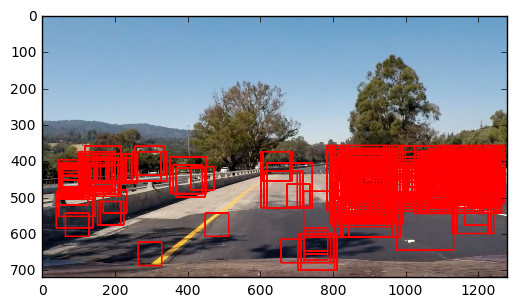

In [13]:
plt.imshow(plot_img)

### vehicle detection in image

In [14]:
bboxes = detector.detect_in_image(test_img)

building vehicle classification model
loaded 8792 vehicle images and 9666 nonvehicle images
built model performance on test: 0.98429035753
CPU times: user 1min 4s, sys: 436 ms, total: 1min 5s
Wall time: 1min 1s


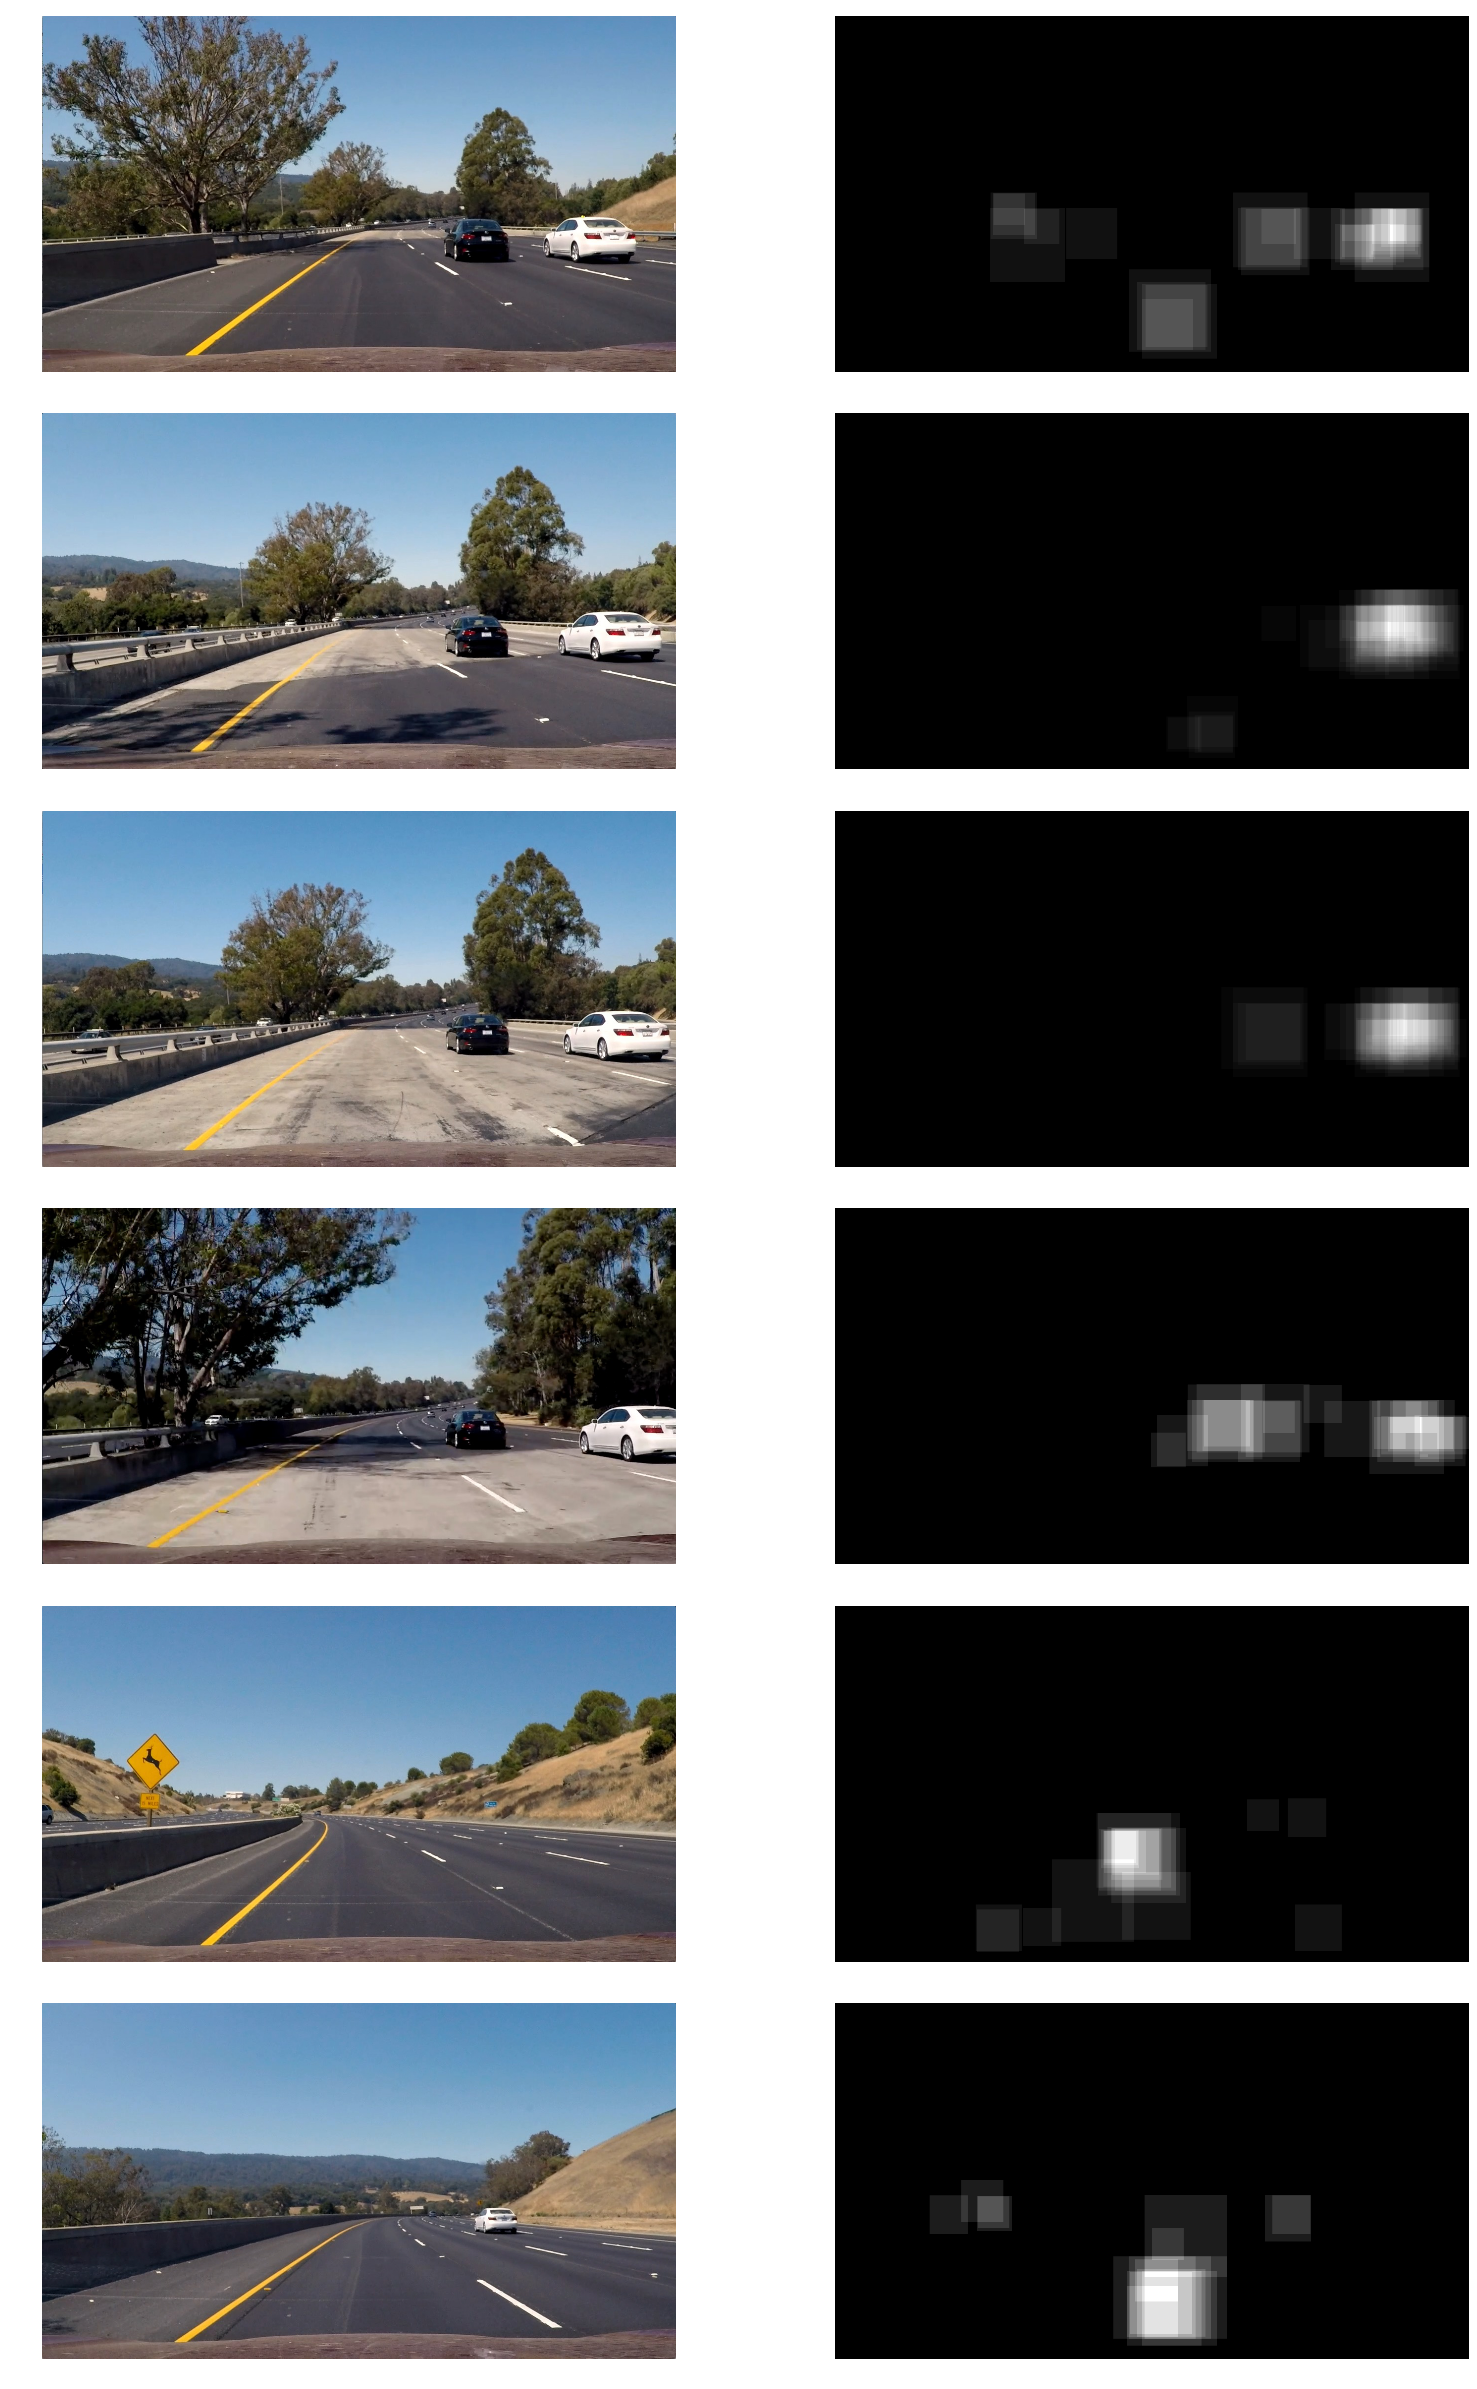

In [17]:
%%time
detector = detector = sdcvehicle.detection.VehicleDetector()

fig, axes = plt.subplots(len(test_imgs), 2, figsize=(8*2, 4*len(test_imgs)))
fig.tight_layout()
for test_img, ax in zip(test_imgs, axes):
    plot_img = test_img.copy()
    heatmap = detector.detect_in_image(test_img)
    ax[0].imshow(test_img)
    ax[0].set_axis_off()
    ax[1].imshow(heatmap, cmap=plt.cm.gray)
    ax[1].set_axis_off()

building vehicle classification model
loaded 8792 vehicle images and 9666 nonvehicle images
built model performance on test: 0.985915492958
CPU times: user 1min 3s, sys: 352 ms, total: 1min 3s
Wall time: 59.7 s


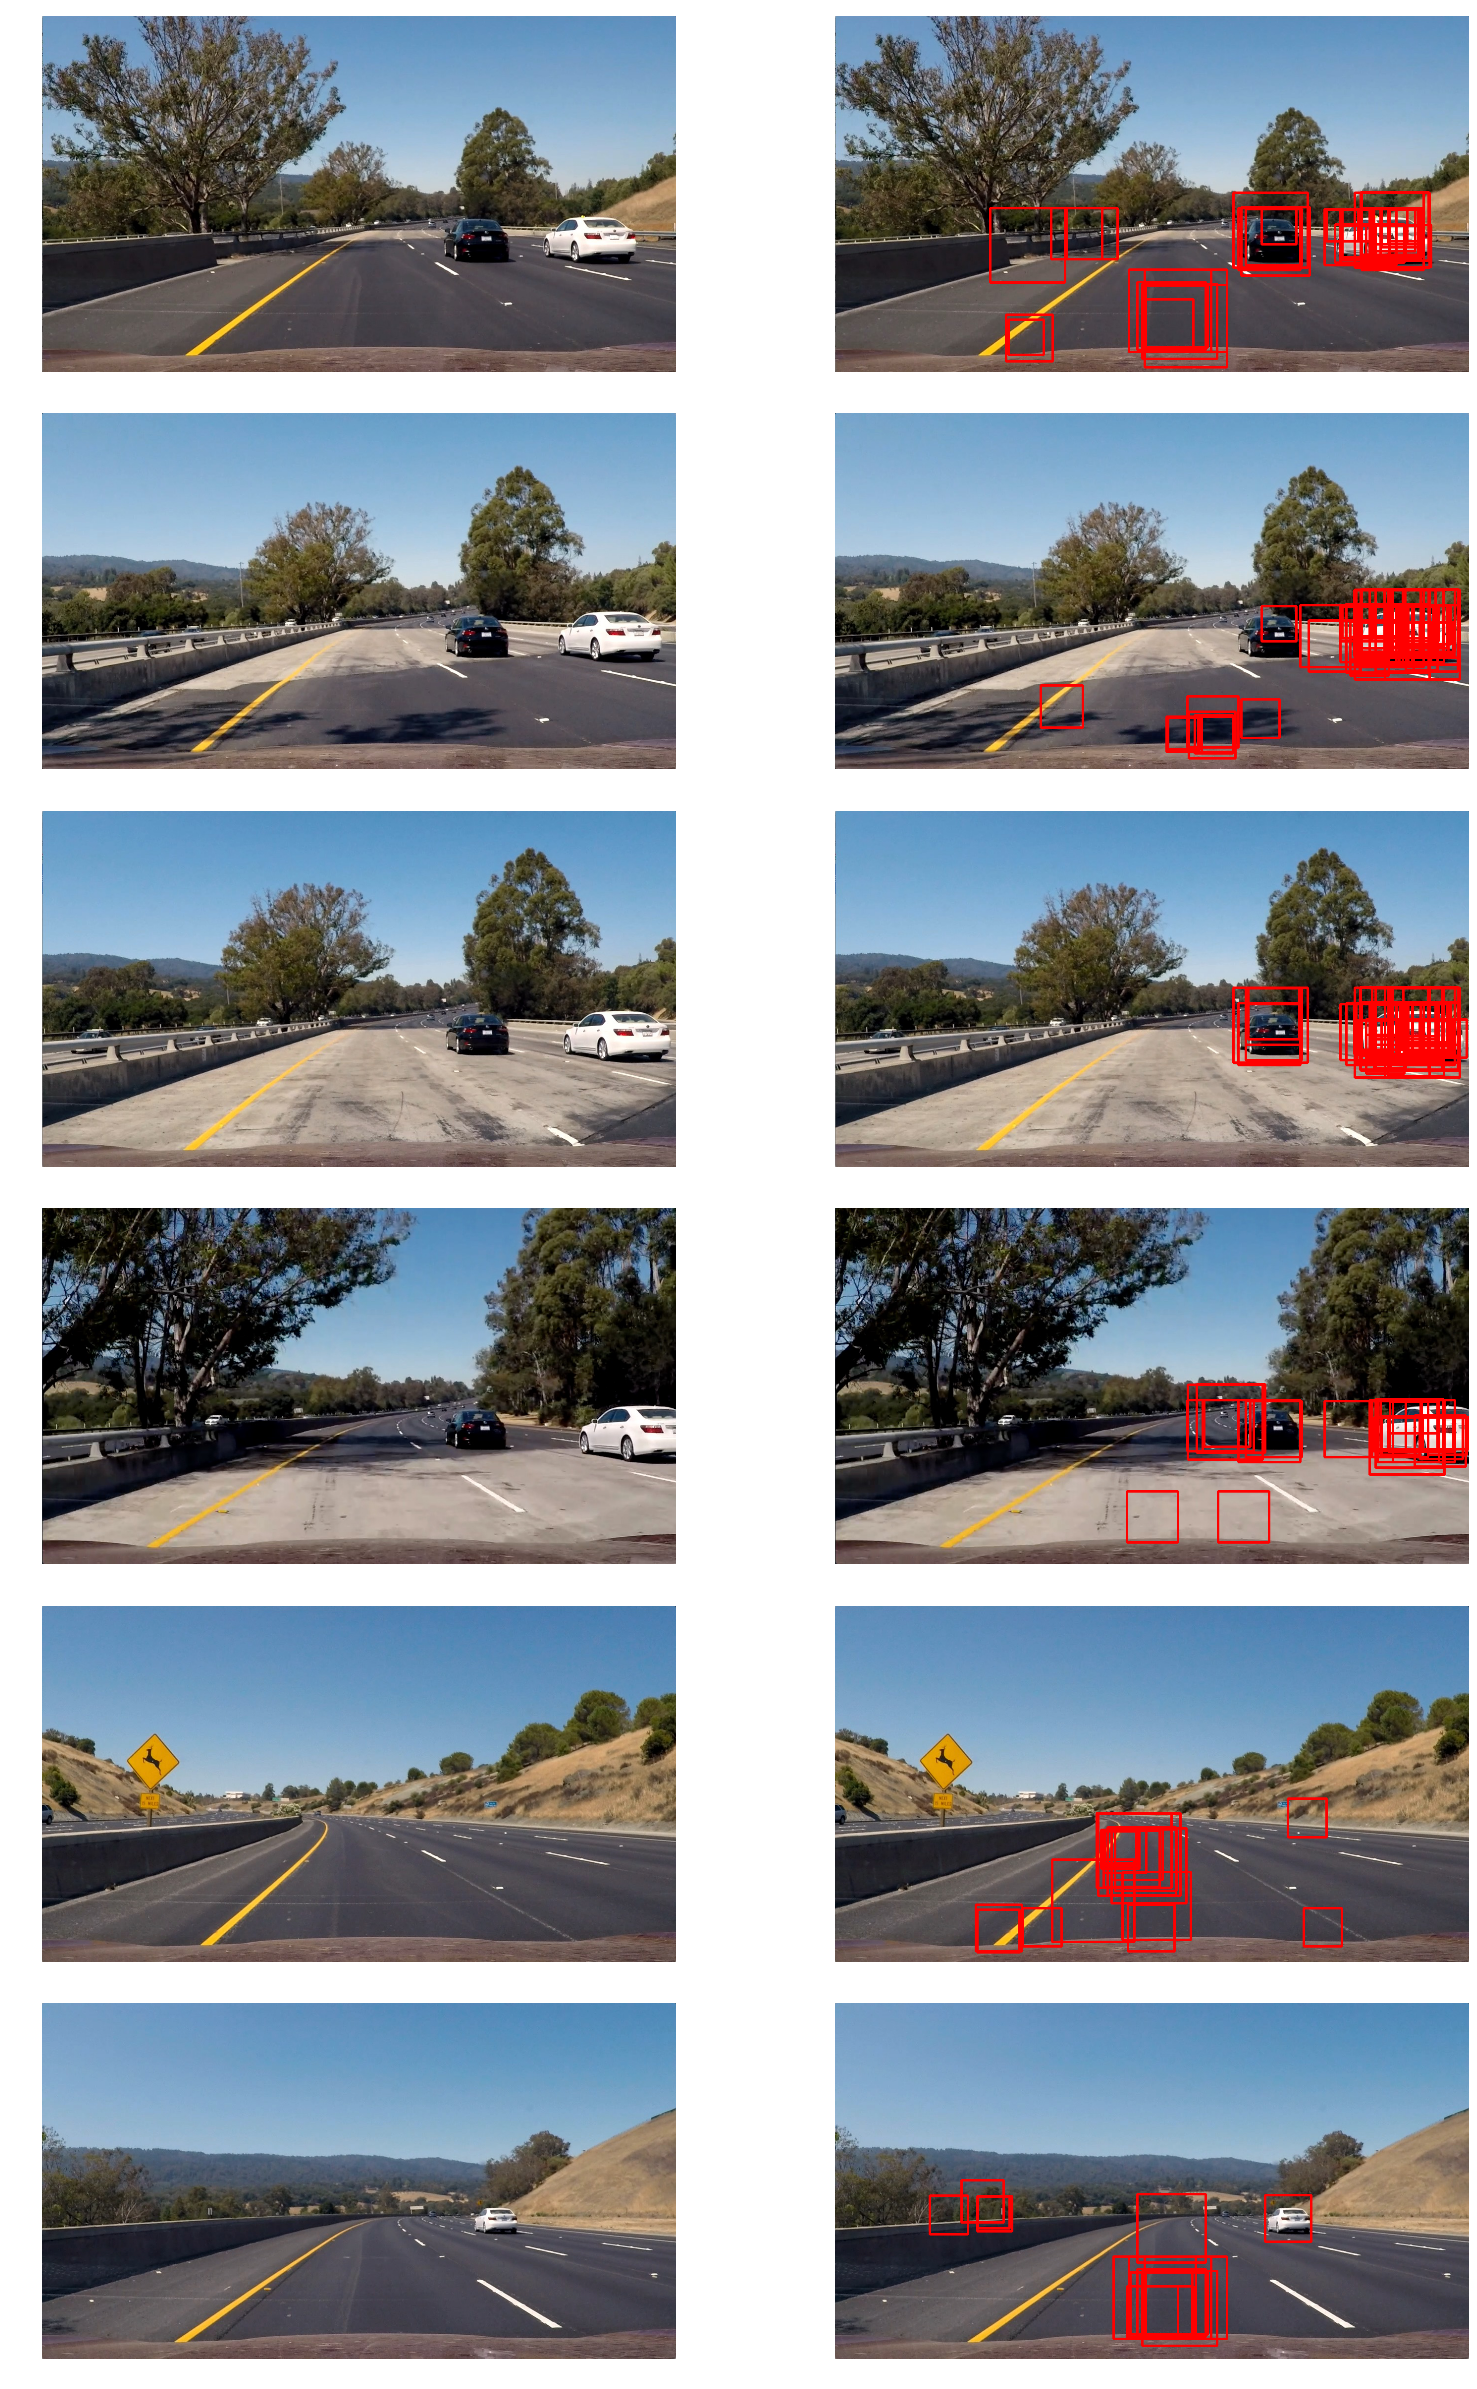

In [23]:
%%time
detector = detector = sdcvehicle.detection.VehicleDetector()

fig, axes = plt.subplots(len(test_imgs), 2, figsize=(8*2, 4*len(test_imgs)))
fig.tight_layout()
for test_img, ax in zip(test_imgs, axes):
    plot_img = test_img.copy()
    bboxes = detector.detect_in_image(test_img)
    for bbox in bboxes:
        cv2.rectangle(plot_img, tuple(bbox[0]), tuple(bbox[1]), (255, 0, 0), 3)
    ax[0].imshow(test_img)
    ax[0].set_axis_off()
    ax[1].imshow(plot_img)
    ax[1].set_axis_off()